# Computational Techniques in Data Science - Assignment 5

## Kevin Obote - 190696

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from numpy.linalg import eig

## One: Steady-State Probability Calculation

Given the following 3×3 transition matrix:

𝑷 = [
    [0.7, 0.2, 0.1],
    [0.3, 0.4, 0.3],
    [0.3, 0.2, 0.5]
]

In [2]:
# 1. Represent the matrix using NumPy
P = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.4, 0.3],
    [0.3, 0.2, 0.5]
])

print("Transition Matrix P:")
print(P)

Transition Matrix P:
[[0.7 0.2 0.1]
 [0.3 0.4 0.3]
 [0.3 0.2 0.5]]


In [3]:
# 2. Verify if this is a valid stochastic matrix

# Check if all elements are non-negative
is_non_negative = np.all(P >= 0)

# Check if each row sums to 1
row_sums = np.sum(P, axis=1)
is_row_stochastic = np.allclose(row_sums, 1.0)

print("All elements non-negative:", is_non_negative)
print("Row sums equal to 1:", is_row_stochastic)
print("Row sums:", row_sums)
print("\nThis is{}a valid stochastic matrix".format(" " if (is_non_negative and is_row_stochastic) else " not "))

All elements non-negative: True
Row sums equal to 1: True
Row sums: [1. 1. 1.]

This is a valid stochastic matrix


In [4]:
# 3. Compute steady-state probabilities

# For steady state π, we need to solve π = πP
# This is equivalent to solving (P.T - I)π = 0
# subject to Σπᵢ = 1

# Method using eigenvalues/eigenvectors
eigenvalues, eigenvectors = eig(P.T)

# Find the eigenvector corresponding to eigenvalue 1
steady_state = eigenvectors[:, np.argmin(np.abs(eigenvalues - 1))].real
steady_state = steady_state / np.sum(steady_state)  # Normalize

print("Steady-state probabilities:")
for i, prob in enumerate(steady_state):
    print(f"State {i}: {prob:.4f}")

# Verify our solution
print("\nVerification - πP should equal π:")
print("πP =", np.dot(steady_state, P))
print("π  =", steady_state)

Steady-state probabilities:
State 0: 0.5000
State 1: 0.2500
State 2: 0.2500

Verification - πP should equal π:
πP = [0.5  0.25 0.25]
π  = [0.5  0.25 0.25]


## Two: Markov Chain Simulation and Visualization

In [5]:
# 1. Simulate Markov chain for 50 steps
np.random.seed(42)  # For reproducibility
n_steps = 50
current_state = 0  # Starting from state 0
states = [current_state]

for _ in range(n_steps - 1):
    # Get transition probabilities for current state
    transition_probs = P[current_state]
    # Choose next state based on transition probabilities
    current_state = np.random.choice(3, p=transition_probs)
    states.append(current_state)

# 2. Count state visits
state_counts = np.bincount(states)
print("Number of visits to each state:")
for state, count in enumerate(state_counts):
    print(f"State {state}: {count} visits")

Number of visits to each state:
State 0: 36 visits
State 1: 4 visits
State 2: 10 visits


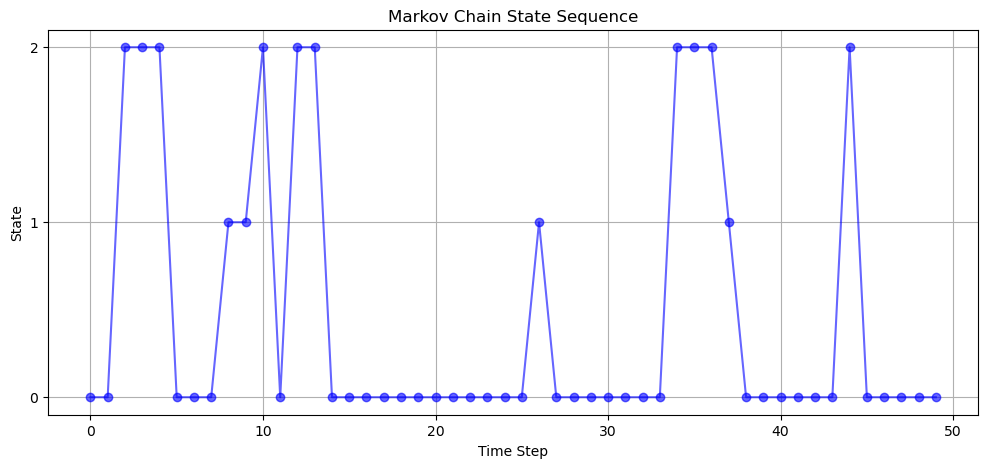

In [6]:
# 3. Plot sequence of visited states
plt.figure(figsize=(12, 5))
plt.plot(range(n_steps), states, 'b-o', alpha=0.6)
plt.grid(True)
plt.title('Markov Chain State Sequence')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.yticks([0, 1, 2])
plt.show()

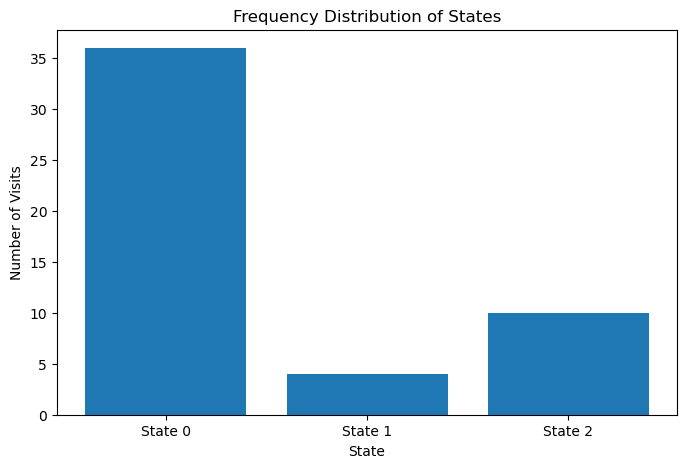

In [7]:
# 4. Visualize frequency distribution
plt.figure(figsize=(8, 5))
plt.bar(['State 0', 'State 1', 'State 2'], state_counts)
plt.title('Frequency Distribution of States')
plt.xlabel('State')
plt.ylabel('Number of Visits')
plt.show()

## Three: Network Visualization of State Transitions

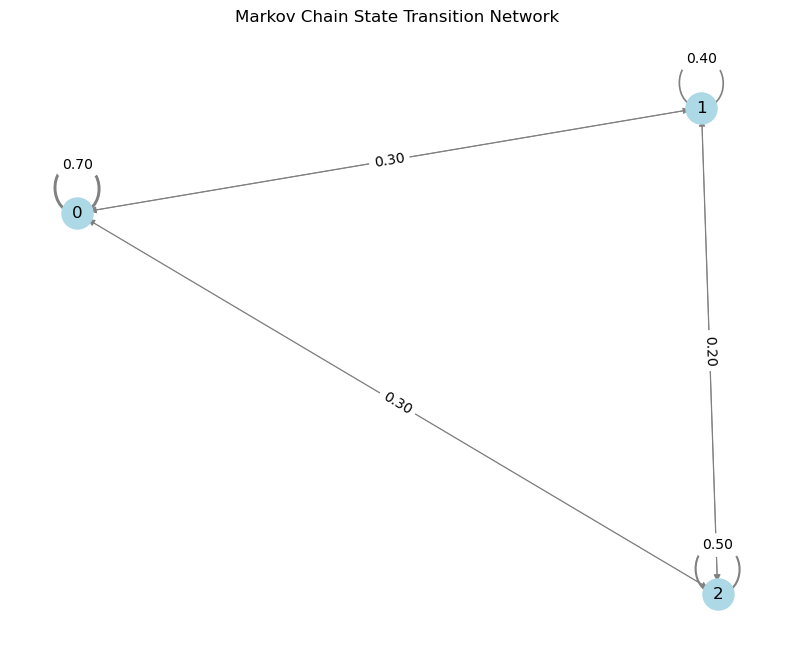

In [8]:
# 1. Create directed graph
G = nx.DiGraph()

# Add nodes
for i in range(3):
    G.add_node(i)

# Add edges with weights
for i in range(3):
    for j in range(3):
        if P[i,j] > 0:
            G.add_edge(i, j, weight=P[i,j])

# 2 & 3. Draw the graph with weighted edges
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                      node_size=500)

# Draw edges with varying thickness
edges = G.edges()
weights = [G[u][v]['weight']*3 for u,v in edges]
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray')

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f'{v:.2f}' for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Add node labels
nx.draw_networkx_labels(G, pos)

plt.title('Markov Chain State Transition Network')
plt.axis('off')
plt.show()